<a href="https://colab.research.google.com/github/rupam-deb/DataPreprocessing/blob/synengcotest/processing_visual_extra_bom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


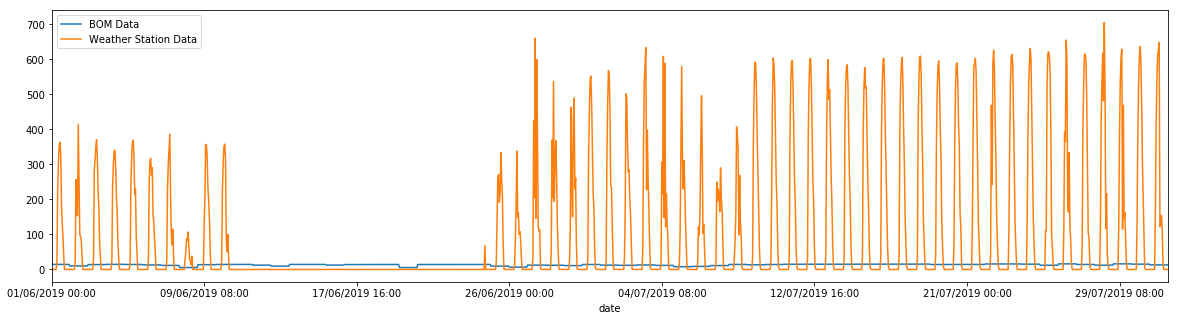

In [2]:
'''
@Task One: 
          (1) Processing the data
          (2) Visualisation of data or results
          (3) Additional Task - Extra BOM data
@Written By: Rupam Deb
@Platform: Python GoogleCoLab
'''

# IMPORT LIBRARY
import os
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta
from datetime import timezone
import csv
from matplotlib import pyplot as plt

# READ GRID FILE function
def read_grd(filename):
    with open(filename) as infile:
        ncols = int(infile.readline().split()[1])
        nrows = int(infile.readline().split()[1])
        xllcorner = float(infile.readline().split()[1])
        yllcorner = float(infile.readline().split()[1])
        cellsize = float(infile.readline().split()[1])
        nodata_value = float(infile.readline().split()[1])
    longitude = xllcorner + cellsize * np.arange(ncols)
    latitude = yllcorner + cellsize * np.arange(nrows)
    value = np.loadtxt(filename, skiprows=6)       
    return longitude, latitude, value 

  
# MOUNT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/gdrive')

# INITIATE DATE
d = datetime.datetime(2019, 6, 1)
d = d - timedelta(hours=1)

# CODE FOR Utc_timestamp: Additional Task - Uploading results to a data store
#dt = datetime.datetime(2019, 6, 1)
#timestamp = dt.replace(tzinfo=timezone.utc)


# PREPARE Local weather station data
corpus_read = os.path.join("/content/gdrive/My Drive/data", "weather_data_new.csv")

# PREPARE Writer File to write results
corpus_write = os.path.join("/content/gdrive/My Drive/data", "weather_BOM.csv")


# READ all grid files for the Month of June and July
entries = os.listdir('/content/gdrive/My Drive/data/Bom')
for entry in entries:
  corpus = os.path.join("/content/gdrive/My Drive/data/Bom", entry)
  data = read_grd(corpus)
  for i in range(24):
    d = d + timedelta(hours=1)
    dt_string = d.strftime("%d/%m/%Y %H:%M")
    myFile_read = open(corpus_read, 'r')
    with myFile_read:
      reader = csv.reader(myFile_read)
      for row in reader:
        if(dt_string == row[0]):
          data_from_weather_station = row[1]
    for j in range(len(data[0])):
      if(data[0][j] == 153.0):
        long = j
    for k in range(len(data[1])):
      if(data[1][k] == -27.500000000000004):
        lat = k   
    # PUT Zero(0) IF THERE IS NO VALUES    
    if (data_from_weather_station == ''):
      data_from_weather_station = 0
    myData = dt_string, data[2][lat][long], data_from_weather_station
    myFile = open(corpus_write, 'a')
    with myFile:
      writer = csv.writer(myFile)
      writer.writerow(myData)
      
# CHANGE HEADER
df = pd.read_csv(corpus_write, header=None)
df.rename(columns={0: 'date', 1: 'BOM Data',2: 'Weather Station Data'}, inplace=True)
df.to_csv(corpus_write, index=False)

# :[TASK Two:VISUALIZE RESULTS with Additional Task - Extra BOM data]:
df = pd.read_csv(corpus_write)
df.set_index('date', inplace=True)
df.plot(figsize=(20,5))
